# **trAPIc**

* trAPIc is a Machine Learning project designed to analyze traffic patterns and detect anomalies within a web server's log data. It leverages unsupervised learning techniques to gain valuable insights into server traffic and potential security threats.

* Enhance the security posture of web servers by proactively detecting anomalous traffic patterns.

* Improve the efficiency of web server operations by identifying potential performance bottlenecks or unusual resource usage.

* Gain valuable insights into user behavior and traffic patterns to optimize server configurations and resource allocation.

* Features used from Dataset : The trAPIc project utilizes a combination of *time-based, traffic volume, user behavior, endpoint-specific, and user agent features to analyze web server log data. These features include timestamps, request counts, response sizes, endpoints accessed, user agents, and status codes.*

## **Loading Dataset**

Converting the log entries to a dataframe for easier access

In [35]:
import pandas as pd
import re
from datetime import datetime

# Function to parse log entries
def parse_log_line(line):
    regex = r'(\d+\.\d+\.\d+\.\d+) - - \[(.*?)\] "(\w+) (\S+) HTTP/\S+" (\d+) (\d+) "([^"]*)" "([^"]*)"'
    match = re.match(regex, line)
    if match:
        ip = match.group(1)
        timestamp = match.group(2)
        method = match.group(3)
        endpoint = match.group(4)
        status_code = int(match.group(5))
        response_size = int(match.group(6))
        referrer = match.group(7)
        user_agent = match.group(8)

        # Convert timestamp to datetime object
        timestamp = datetime.strptime(timestamp, "%d/%b/%Y:%H:%M:%S %z")

        return {
            'IP': ip,
            'Timestamp': timestamp,
            'Method': method,
            'Endpoint': endpoint,
            'StatusCode': status_code,
            'ResponseSize': response_size,
            'Referrer': referrer,
            'UserAgent': user_agent
        }

# Load log data from file
def load_logs(file_path):
    logs = []
    with open(file_path, 'r') as file:
        for line in file:
            logs.append(parse_log_line(line.strip()))
    return pd.DataFrame(logs)

# Example usage
log_df = load_logs("/content/drive/MyDrive/ColabNotebooks/trAPIc/logfiles_dataset.log")
log_df.head()

,IP,Timestamp,Method,Endpoint,StatusCode,ResponseSize,Referrer,UserAgent
0,219.214.151.139,2037-12-27 12:00:00+05:30,DELETE,/usr/admin,304,5000,http://heath.info/categoriesindex.htm,Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000)...
1,79.77.170.93,2037-12-27 12:00:00+05:30,POST,/usr/register,502,5036,http://heath.info/categoriesindex.htm,Mozilla/5.0 (iPhone; CPU iPhone OS 12_4_9 like...
2,96.88.78.150,2037-12-27 12:00:00+05:30,DELETE,/usr/login,404,5011,-,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3)...
3,153.35.128.209,2037-12-27 12:00:00+05:30,POST,/usr,403,5028,-,Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000)...
4,207.186.16.244,2037-12-27 12:00:00+05:30,POST,/usr/admin,200,5006,-,Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000)...


In [36]:
# Loading the logs as before
log_df = load_logs("/content/drive/MyDrive/ColabNotebooks/trAPIc/logfiles_dataset.log")
print(log_df.info())  # Check for missing values and data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                    
---  ------        --------------  -----                    
 0   IP            4000 non-null   object                   
 1   Timestamp     4000 non-null   datetime64[ns, UTC+05:30]
 2   Method        4000 non-null   object                   
 3   Endpoint      4000 non-null   object                   
 4   StatusCode    4000 non-null   int64                    
 5   ResponseSize  4000 non-null   int64                    
 6   Referrer      4000 non-null   object                   
 7   UserAgent     4000 non-null   object                   
dtypes: datetime64[ns, UTC+05:30](1), int64(2), object(5)
memory usage: 250.1+ KB
None


### Checking for null values

In [37]:
log_df.isnull().sum()

,0
IP,0
Timestamp,0
Method,0
Endpoint,0
StatusCode,0
ResponseSize,0
Referrer,0
UserAgent,0


## **Exploratory Data Analysis**

Data Visualization for various features available in the dataset

<ipython-input-38-6d4cca45da66>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=log_df, x='Method', palette='viridis', order=log_df['Method'].value_counts().index)


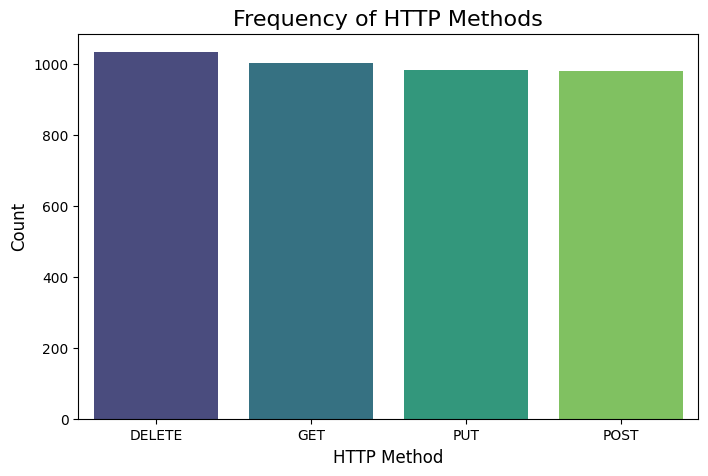

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count Plot for HTTP Methods
plt.figure(figsize=(8, 5))
sns.countplot(data=log_df, x='Method', palette='viridis', order=log_df['Method'].value_counts().index)
plt.title("Frequency of HTTP Methods", fontsize=16)
plt.xlabel("HTTP Method", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


<ipython-input-39-cd44dc0932a5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=log_df, x='StatusCode', palette='coolwarm', order=log_df['StatusCode'].value_counts().index)


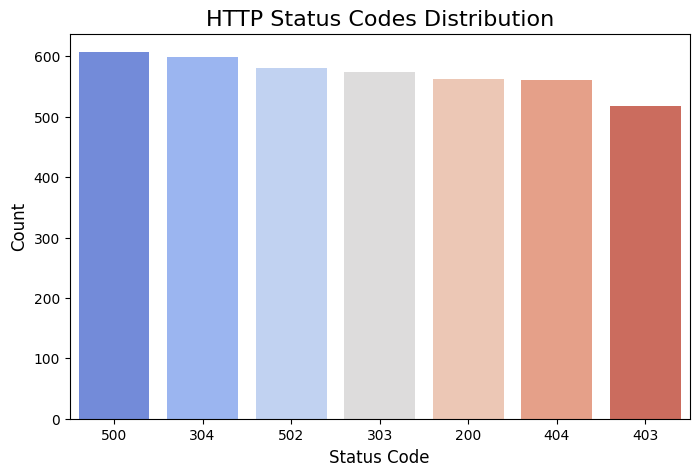

In [39]:
# Count Plot for Status Codes
plt.figure(figsize=(8, 5))
sns.countplot(data=log_df, x='StatusCode', palette='coolwarm', order=log_df['StatusCode'].value_counts().index)
plt.title("HTTP Status Codes Distribution", fontsize=16)
plt.xlabel("Status Code", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


<ipython-input-40-b751d98c98ca>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=log_df, x='Method', y='ResponseSize', palette='Set2')


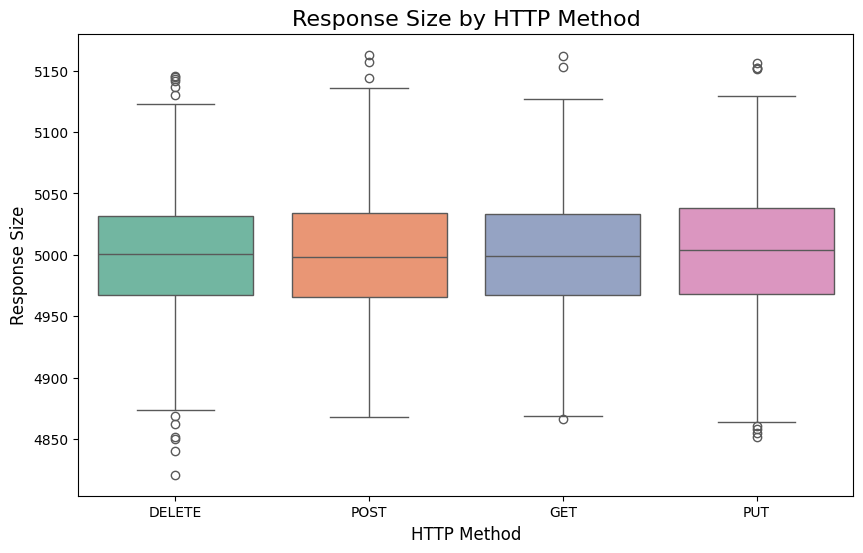

In [40]:
# Boxplot for Response Size by HTTP Method
plt.figure(figsize=(10, 6))
sns.boxplot(data=log_df, x='Method', y='ResponseSize', palette='Set2')
plt.title("Response Size by HTTP Method", fontsize=16)
plt.xlabel("HTTP Method", fontsize=12)
plt.ylabel("Response Size", fontsize=12)
plt.show()


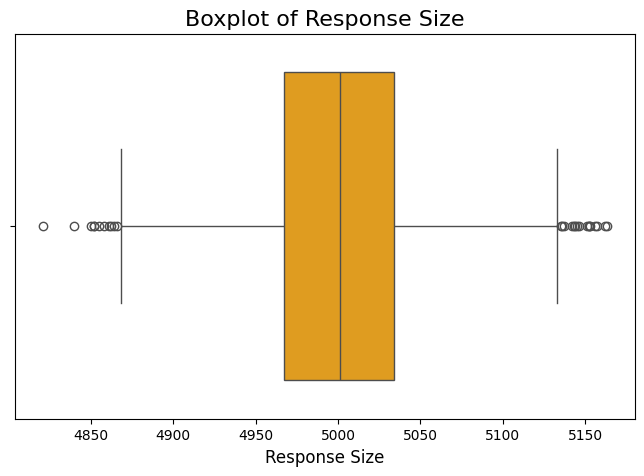

In [41]:
# Boxplot for Response Size
plt.figure(figsize=(8, 5))
sns.boxplot(data=log_df, x='ResponseSize', color='orange')
plt.title("Boxplot of Response Size", fontsize=16)
plt.xlabel("Response Size", fontsize=12)
plt.show()


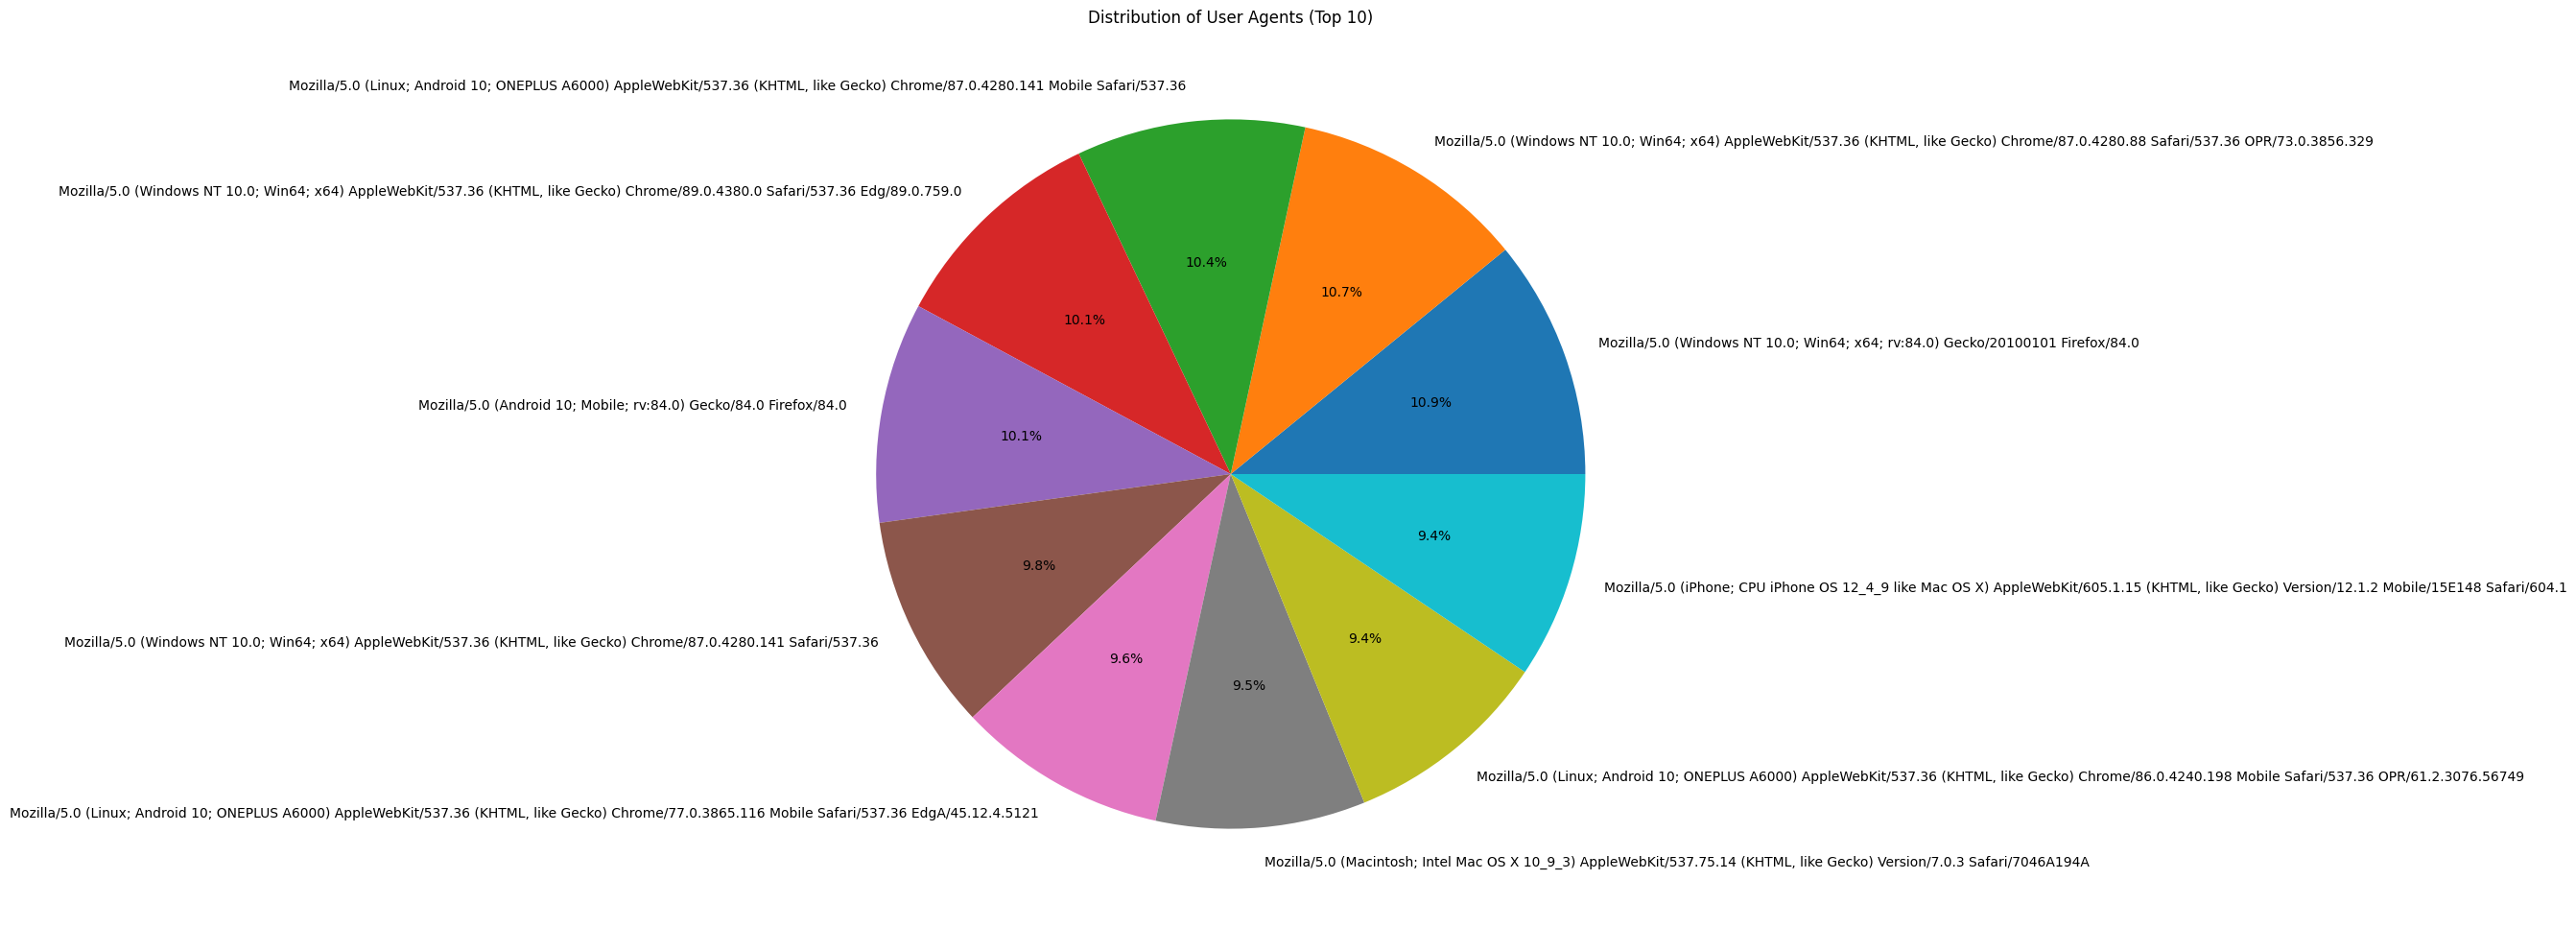

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 5. User Agent Distribution (optional)
plt.figure(figsize=(14, 12))
user_agent_counts = log_df['UserAgent'].value_counts()[:10]  # Limit to top 10 for better visualization
plt.pie(user_agent_counts.values, labels=user_agent_counts.index, autopct='%1.1f%%')
plt.title('Distribution of User Agents (Top 10)')
plt.show()

### Data Cleaning :

* Handle missing values (imputation, removal).
* Address outliers (removal, transformation).
* Correct inconsistencies (data type conversions, format adjustments).


In [43]:
import pandas as pd
import numpy as np

def preprocess_log_data(log_df):
    """
    Preprocesses the log data by handling missing values, removing duplicates, and sanitizing the data.

    Args:
        log_df: pandas DataFrame containing the log data.

    Returns:
        pandas DataFrame with preprocessed log data.
    """
    print("Starting preprocessing...")

    # Initial data overview
    print(f"Initial shape of the data: {log_df.shape}")
    print(f"Initial missing values:\n{log_df.isnull().sum()}")

    # Handle Missing Values
    missing_before = log_df['ResponseSize'].isnull().sum()
    log_df['ResponseSize'] = log_df['ResponseSize'].fillna(0)
    missing_after = log_df['ResponseSize'].isnull().sum()
    print(f"Missing values in 'ResponseSize': {missing_before} -> {missing_after}")

    # Remove Duplicates
    duplicates_before = log_df.duplicated().sum()
    log_df = log_df.drop_duplicates()
    duplicates_after = log_df.duplicated().sum()
    print(f"Duplicates removed: {duplicates_before - duplicates_after}")

    # Sanitize Data
    negative_entries = (log_df['ResponseSize'] < 0).sum()
    log_df = log_df[log_df['ResponseSize'] >= 0]
    print(f"Negative 'ResponseSize' entries removed: {negative_entries}")

    # Final data overview
    print(f"Final shape of the data: {log_df.shape}")
    print("Preprocessing completed successfully.")

    return log_df

# Example Usage
# Assuming 'log_df' is already defined with relevant columns
proc_df = preprocess_log_data(log_df)


Starting preprocessing...
Initial shape of the data: (4000, 8)
Initial missing values:
IP              0
Timestamp       0
Method          0
Endpoint        0
StatusCode      0
ResponseSize    0
Referrer        0
UserAgent       0
dtype: int64
Missing values in 'ResponseSize': 0 -> 0
Duplicates removed: 0
Negative 'ResponseSize' entries removed: 0
Final shape of the data: (4000, 8)
Preprocessing completed successfully.


### **Feature Engineering and Outlier Removal**

* To proceed with feature engineering, we first need to understand the correlation between the features in your dataset.

* Outliers often indicate errors in data collection, entry, or processing. Removing them helps to clean the data and improve its overall quality.

* Removing outliers can help the model generalize better.



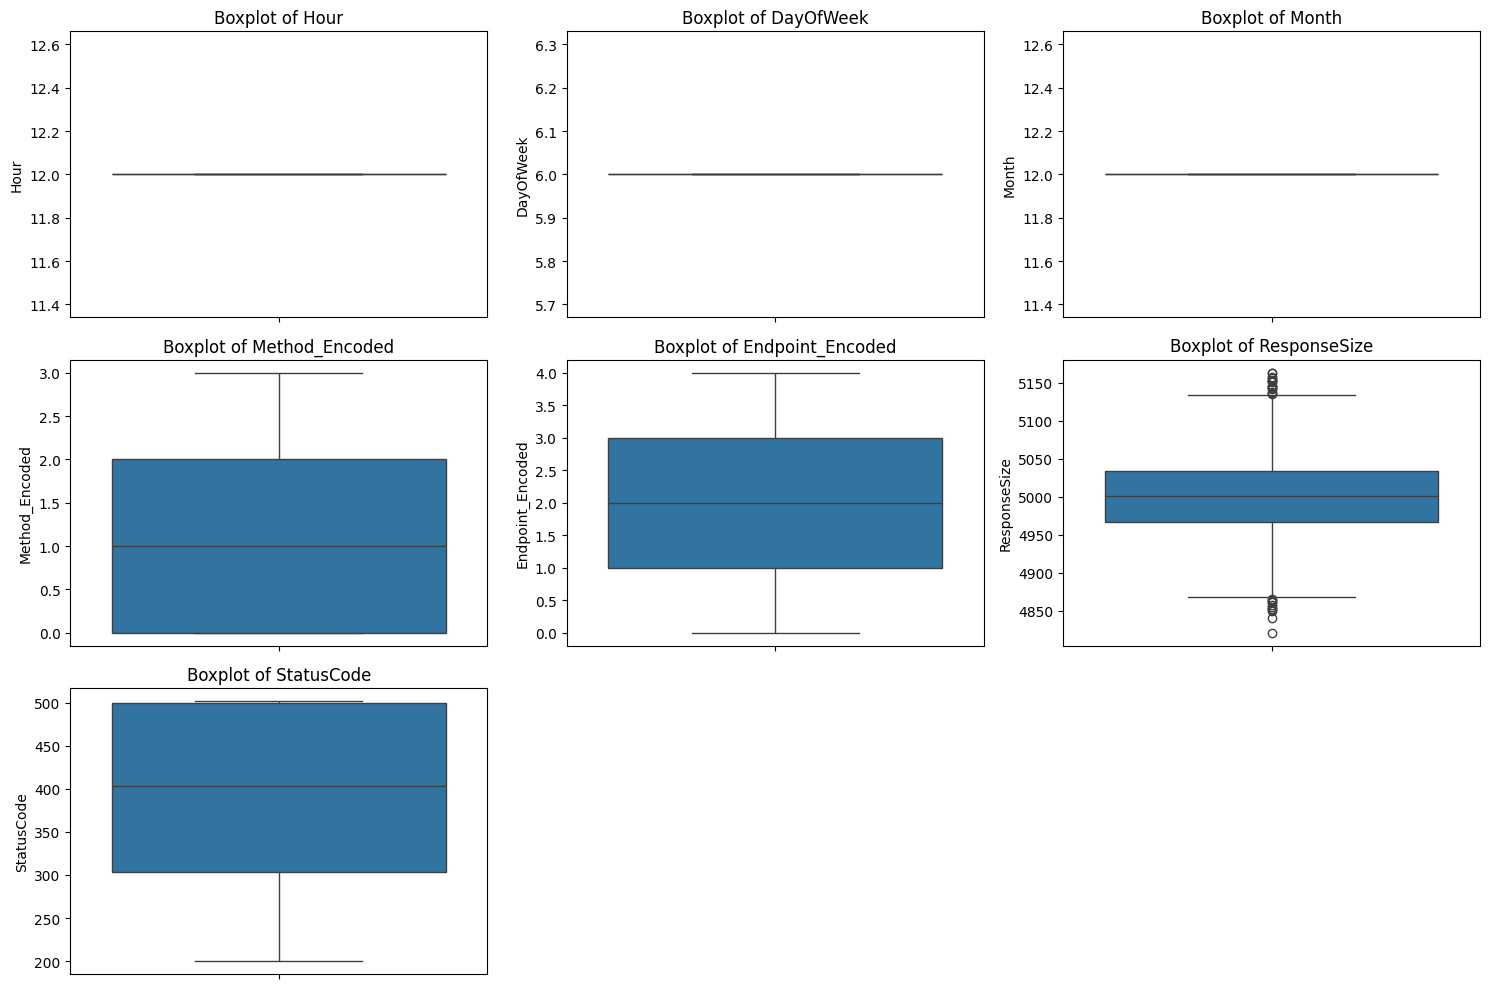

Number of Outliers Detected: 400
Dataset Size Before: (4000, 14), After: (3600, 14)


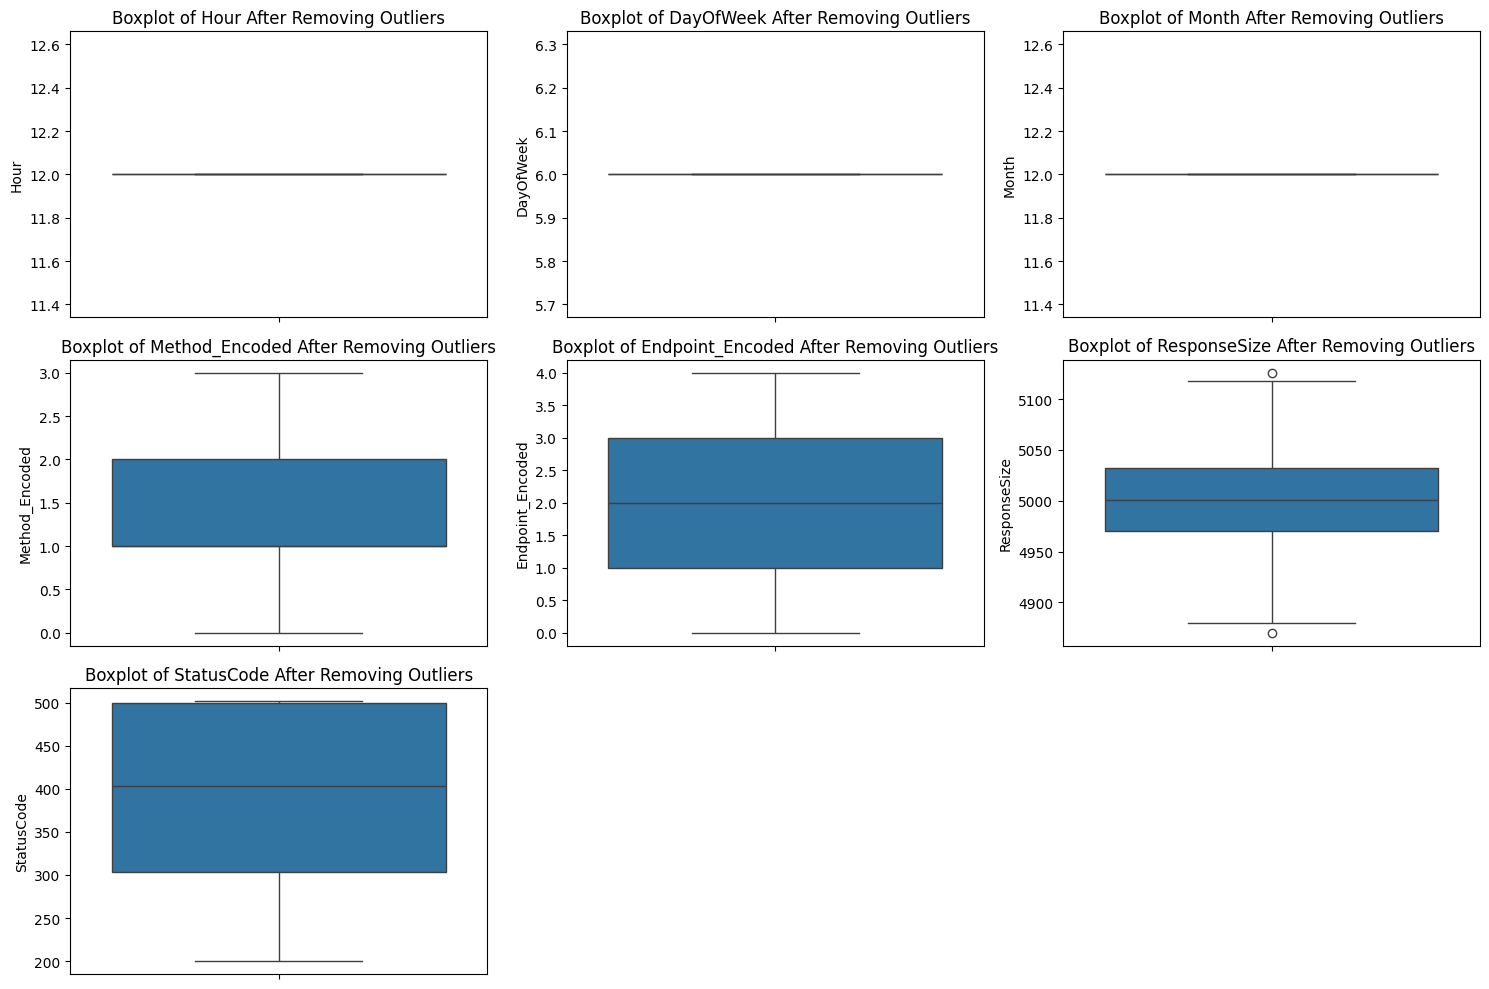

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import pandas as pd

# Step 1: Ensure Derived Features Exist
if 'Hour' not in proc_df.columns:
    proc_df['Hour'] = pd.to_datetime(proc_df['Timestamp']).dt.hour
if 'DayOfWeek' not in proc_df.columns:
    proc_df['DayOfWeek'] = pd.to_datetime(proc_df['Timestamp']).dt.dayofweek  # 0=Monday, 6=Sunday
if 'Month' not in proc_df.columns:
    proc_df['Month'] = pd.to_datetime(proc_df['Timestamp']).dt.month

# Step 2: Encode Categorical Features
if 'Method_Encoded' not in proc_df.columns:
    proc_df['Method_Encoded'] = proc_df['Method'].astype('category').cat.codes
if 'Endpoint_Encoded' not in proc_df.columns:
    proc_df['Endpoint_Encoded'] = proc_df['Endpoint'].astype('category').cat.codes

# Selected features for outlier analysis
selected_features = ['Hour', 'DayOfWeek', 'Month', 'Method_Encoded', 'Endpoint_Encoded', 'ResponseSize', 'StatusCode']

# Step 3: Visualize Outliers (Boxplot)
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=proc_df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

# Step 4: Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)  # 5% outliers
proc_df['Anomaly'] = iso_forest.fit_predict(proc_df[selected_features])

# Identify and remove outliers
outliers = proc_df[proc_df['Anomaly'] == -1]
data_cleaned = proc_df[proc_df['Anomaly'] == 1]

print(f"Number of Outliers Detected: {len(outliers)}")
print(f"Dataset Size Before: {proc_df.shape}, After: {data_cleaned.shape}")

# Step 5: Re-visualize After Removing Outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data_cleaned[feature])
    plt.title(f'Boxplot of {feature} After Removing Outliers')
plt.tight_layout()
plt.show()



* In ResponseSize, few minor outliers remain on the lower and upper ends. This could be acceptable depending on the analysis context, we remove it using isolation forest method

* The algorithm isolates anomalous data points by constructing multiple randomized trees. These trees partition the data space randomly, and anomalies tend to be isolated quickly with fewer splits.

* The algorithm measures the path length required to isolate each data point in the trees. Anomalies typically have shorter average path lengths compared to normal data points, as they are easier to isolate due to their unusual characteristics.

In [45]:
data_cleaned.head()

,IP,Timestamp,Method,Endpoint,StatusCode,ResponseSize,Referrer,UserAgent,Hour,DayOfWeek,Month,Method_Encoded,Endpoint_Encoded,Anomaly
0,219.214.151.139,2037-12-27 12:00:00+05:30,DELETE,/usr/admin,304,5000,http://heath.info/categoriesindex.htm,Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000)...,12,6,12,0,1,1
1,79.77.170.93,2037-12-27 12:00:00+05:30,POST,/usr/register,502,5036,http://heath.info/categoriesindex.htm,Mozilla/5.0 (iPhone; CPU iPhone OS 12_4_9 like...,12,6,12,2,4,1
2,96.88.78.150,2037-12-27 12:00:00+05:30,DELETE,/usr/login,404,5011,-,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3)...,12,6,12,0,3,1
3,153.35.128.209,2037-12-27 12:00:00+05:30,POST,/usr,403,5028,-,Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000)...,12,6,12,2,0,1
4,207.186.16.244,2037-12-27 12:00:00+05:30,POST,/usr/admin,200,5006,-,Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000)...,12,6,12,2,1,1


Explained Variance by Components: [0.26084122 0.25151619]


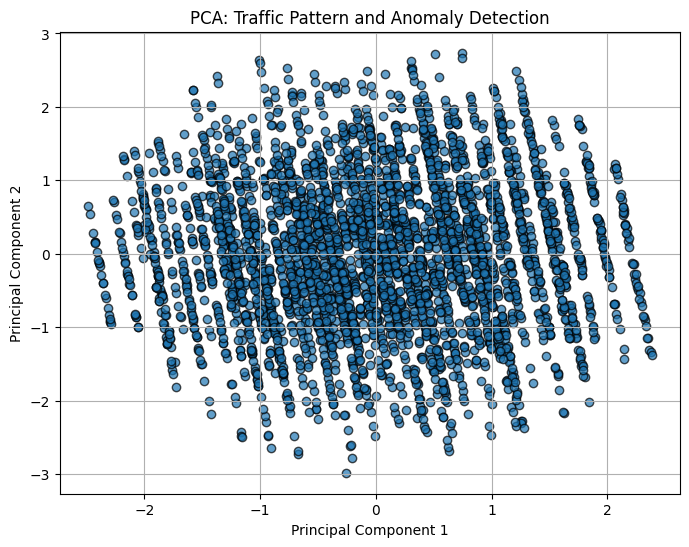

In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Sample Data (replace with your DataFrame)
data = data_cleaned.copy()

# Feature Engineering
# Extract cyclical features from Timestamp
data['Hour'] = pd.to_datetime(data['Timestamp']).dt.hour
data['DayOfWeek'] = pd.to_datetime(data['Timestamp']).dt.dayofweek
data['Month'] = pd.to_datetime(data['Timestamp']).dt.month

# Encode Method and Endpoint
le_method = LabelEncoder()
data['Method_Encoded'] = le_method.fit_transform(data['Method'])

le_endpoint = LabelEncoder()
data['Endpoint_Encoded'] = le_endpoint.fit_transform(data['Endpoint'])

# Select features for PCA
features = ['Hour', 'DayOfWeek', 'Month', 'Method_Encoded', 'Endpoint_Encoded', 'ResponseSize', 'StatusCode']
X = data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components
X_pca = pca.fit_transform(X_scaled)

# Explained Variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by Components:", explained_variance)

# Add PCA components to the DataFrame
data['PC1'] = X_pca[:, 0]
data['PC2'] = X_pca[:, 1]

# Plot the PCA components
plt.figure(figsize=(8, 6))
plt.scatter(data['PC1'], data['PC2'], alpha=0.7, edgecolors='k')
plt.title('PCA: Traffic Pattern and Anomaly Detection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


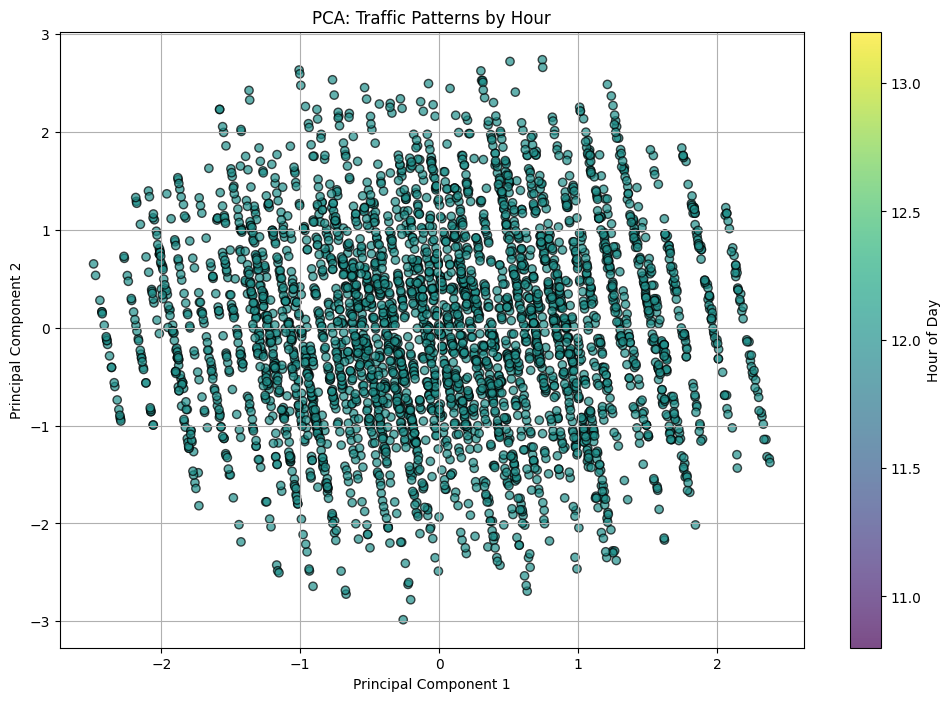

In [47]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data['PC1'], data['PC2'], c=data['Hour'], cmap='viridis', alpha=0.7, edgecolors='k')
plt.colorbar(scatter, label='Hour of Day')
plt.title('PCA: Traffic Patterns by Hour')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


* Identification of Traffic Peaks: By observing the density of points and their distribution in the plot, we might be able to identify hours with high traffic volume (dense clusters) and hours with low traffic volume (sparsely populated areas).

* Detection of Unusual Patterns: Any outliers or points that deviate significantly from the general trend might indicate unusual traffic patterns or anomalies that require further investigation.

* Segmentation of Traffic: The clusters observed in the plot might suggest natural groupings of hours with similar traffic characteristics, which could be useful for traffic management or resource allocation.

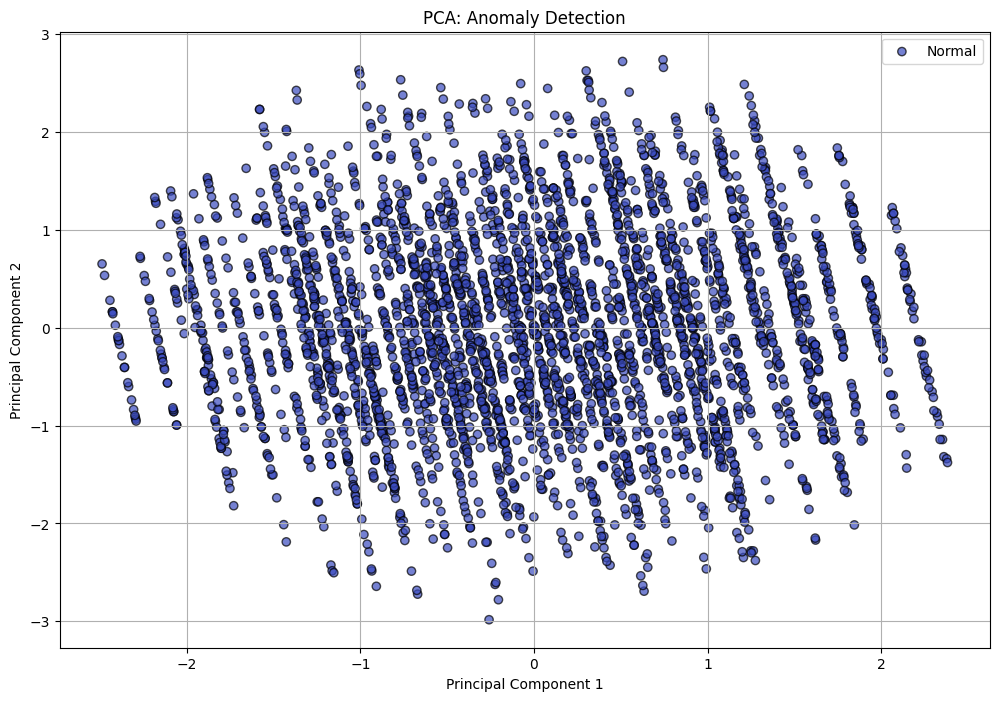

In [48]:
plt.figure(figsize=(12, 8))
plt.scatter(data['PC1'], data['PC2'], c=(data['Anomaly'] == -1), cmap='coolwarm', alpha=0.7, edgecolors='k')
plt.title('PCA: Anomaly Detection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.legend(['Normal', 'Anomaly'])
plt.show()



* Data Characteristics: The plot suggests that the data exhibits a relatively consistent pattern in the PCA space. This might indicate that the traffic patterns are generally predictable and follow a regular schedule.

* Further Analysis: To confirm or identify potential anomalies, it would be necessary to apply anomaly detection algorithms to the data and examine the results. Techniques like Isolation Forest, One-Class SVM, or Autoencoders could be used to identify subtle deviations that might not be visually apparent in the PCA plot.

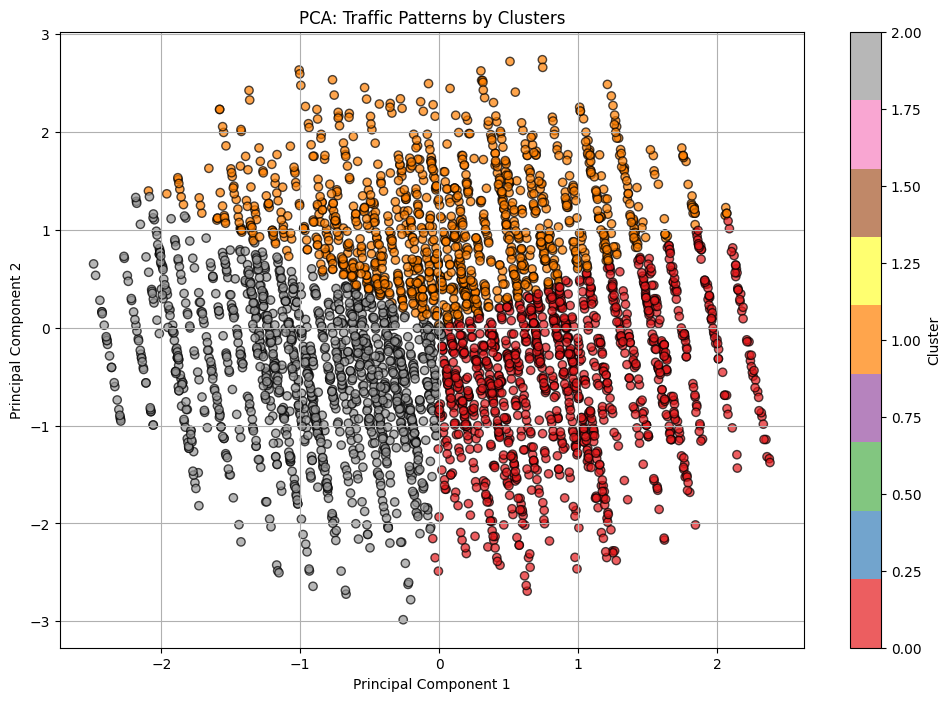

In [49]:
from sklearn.cluster import KMeans

# Apply KMeans to PCA data
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['PC1', 'PC2']])

# Visualize Clusters
plt.figure(figsize=(12, 8))
plt.scatter(data['PC1'], data['PC2'], c=data['Cluster'], cmap='Set1', alpha=0.7, edgecolors='k')
plt.title('PCA: Traffic Patterns by Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.colorbar(label='Cluster')
plt.show()


## **Model training**

In [50]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Make a copy to ensure we don't modify the original dataframe
df = data_cleaned.copy()

# Apply Label Encoding for categorical columns (excluding 'IP' for now)
categorical_columns = ['Method', 'Endpoint', 'Referrer', 'UserAgent']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Convert the 'IP' column into numerical format
df['IP'] = df['IP'].apply(lambda x: int(x.replace('.', '')))

# Convert 'Timestamp' to numerical format (Unix timestamp)
df['Timestamp'] = pd.to_datetime(df['Timestamp']).astype(int) / 10**9


*Feature Scaling* :
Normalize the features to ensure they contribute equally to the model's performance

In [51]:
# Now scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)


**Defining the Autoencoder Architecture**

In [52]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define input dimension
input_dim = scaled_features.shape[1]

# Define autoencoder structure
input_layer = Input(shape=(input_dim,))
encoded = Dense(16, activation='relu')(input_layer)
encoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Compile model
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 14)                  │             238 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 758 (2.96 KB)

 Trainable params: 758 (2.96 KB)

 Non-trainable params: 0 (0.00 B)

**Model Training**


In [53]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = autoencoder.fit(
    scaled_features, scaled_features,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)


Epoch 1/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.8611 - val_loss: 0.6994
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6706 - val_loss: 0.6013
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6010 - val_loss: 0.5607
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5624 - val_loss: 0.5046
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5138 - val_loss: 0.4610
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4534 - val_loss: 0.4254
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4271 - val_loss: 0.4043
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4040 - val_loss: 0.3941
Epoch 9/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3975 - val_loss: 0.3836
Epoch 10/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3803 - val_loss: 0.3736
Epoch 11/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3725 - val_loss: 0.3677
Epoch 12/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3

In [54]:
import numpy as np

# Predict the reconstructed data
reconstructed_data = autoencoder.predict(scaled_features)

# Calculate the reconstruction error
reconstruction_error = np.mean(np.square(scaled_features - reconstructed_data), axis=1)

# Analyze the reconstruction error
mean_error = np.mean(reconstruction_error)
std_error = np.std(reconstruction_error)
threshold = mean_error + 3 * std_error  # Setting a threshold for anomaly detection

print(f"Mean Reconstruction Error: {mean_error}")
print(f"Standard Deviation of Reconstruction Error: {std_error}")
print(f"Threshold for Anomalies: {threshold}")


113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Reconstruction Error: 0.342398156416376
Standard Deviation of Reconstruction Error: 0.19965641892163488
Threshold for Anomalies: 0.9413674131812806


**INSIGHTS**

* A value of 0.342 indicates that the model has a relatively low average error when reconstructing the normal data patterns. This suggests the model has learned the underlying structure of the dataset effectively.

* The standard deviation of 0.200 shows that the reconstruction errors are consistent and not highly variable, indicating a stable model performance.

* The threshold of 0.941 implies that any data point with a reconstruction error above this value will be classified as an anomaly. This threshold balances between sensitivity and specificity for detecting anomalies.



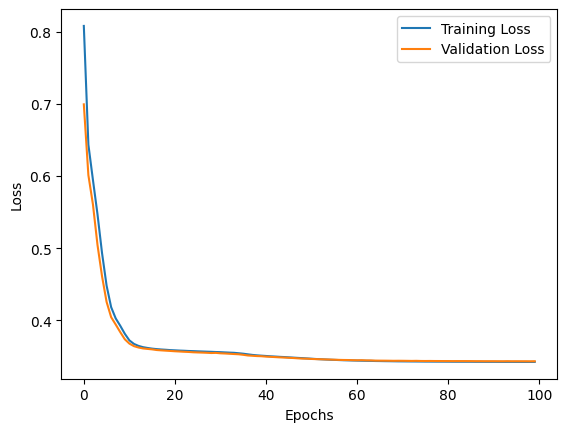

In [55]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**INSIGHTS**

* The training and validation loss curves are closely aligned throughout the training process, suggesting that the model generalizes well to unseen data and is not overfitting.

* After around 20 epochs, the training and validation losses start to stabilize and converge, indicating that the model is no longer learning significantly from additional epochs.

* The final values of both losses are low and plateaued, indicating that the model has achieved a stable state and has effectively minimized reconstruction error.

* This plot indicates a well-trained model with no signs of overfitting or underfitting.

* The model appears to generalize well, with consistent performance on both training and validation datasets.







113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Total Test Samples: 3600
Number of Anomalies Detected: 16
Indices of Anomalies: [156 269 325 402 418]


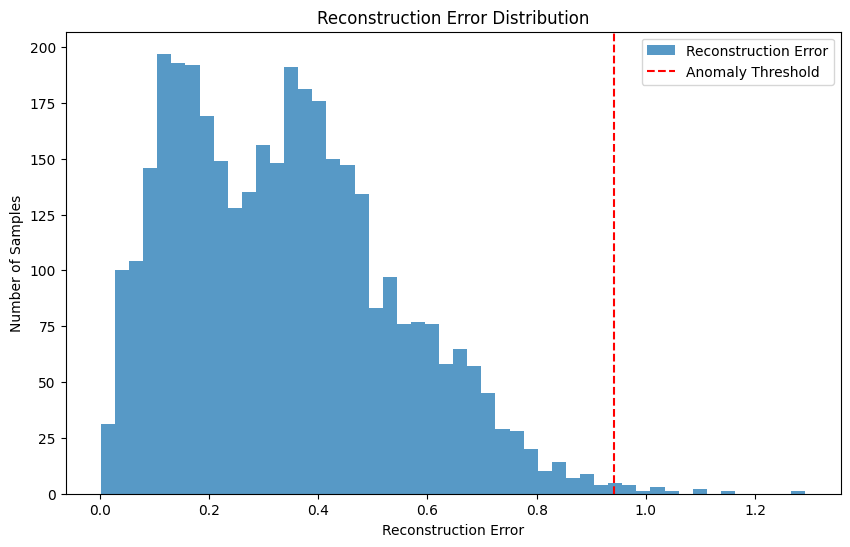

In [56]:
import numpy as np
# Predict the reconstructed data
reconstructed_data = autoencoder.predict(scaled_features)

# Calculate the reconstruction error
reconstruction_error = np.mean(np.square(scaled_features - reconstructed_data), axis=1)

# Classify data points as normal or anomalous
# Anomalies are those points where the reconstruction error exceeds the threshold
threshold = 0.9412389464529394  # Use the threshold computed earlier
anomalies = reconstruction_error > threshold

# Print the results
print(f"Total Test Samples: {len(reconstruction_error)}")
print(f"Number of Anomalies Detected: {np.sum(anomalies)}")

# Optional: Analyze a few anomalies
anomaly_indices = np.where(anomalies)[0]
print(f"Indices of Anomalies: {anomaly_indices[:5]}")  # Display first 5 anomaly indices

# Visualization of reconstruction errors
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(reconstruction_error, bins=50, alpha=0.75, label='Reconstruction Error')
plt.axvline(x=threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Number of Samples')
plt.title('Reconstruction Error Distribution')
plt.legend()
plt.show()


**Saving the model**

In [57]:
# Save the trained autoencoder model
autoencoder_model_path = '/content/drive/MyDrive/ColabNotebooks/trAPIc/autoencoder_model.h5'
autoencoder.save(autoencoder_model_path)

autoencoder_model_path


'/content/drive/MyDrive/ColabNotebooks/trAPIc/autoencoder_model.h5'